In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.table import Table
import regions
from regions import Regions

In [2]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [3]:
from jwst_plots import JWSTCatalog
from jwst_plots import make_cat_use

In [4]:
basepath = '/orange/adamginsburg/jwst/cloudc/'
#'/home/savannahgramze/research/Research/JWST/cloudc/'

# Load Catalog

In [5]:
fn_405 = f'{basepath}/images/F410_reproj_merged-fortricolor.fits'
ww = WCS(fits.open(fn_405)[0].header)

In [6]:
reg_filament = Regions.read(f'./regions_/filament_long.region')
reg_filhole = Regions.read(f'./regions_/filhole.region')
reg_cloudd = Regions.read(f'./regions_/cloudd.region')
reg_cloudc1 = Regions.read(f'./regions_/cloudc1.region')
reg_cloudc2 = Regions.read(f'./regions_/cloudc2.region')
#reg_filament_long = Regions.read(f'{basepath}/regions_/filament_long.region')

In [7]:
cat_use = make_cat_use()

In [8]:
cat_filament = JWSTCatalog(cat_use.table_region_mask(reg_filament, wcs=ww))
cat_cloudd =   JWSTCatalog(cat_use.table_region_mask(reg_cloudd, wcs=ww))
cat_cloudc1 =  JWSTCatalog(cat_use.table_region_mask(reg_cloudc1, wcs=ww))
cat_cloudc2 =  JWSTCatalog(cat_use.table_region_mask(reg_cloudc2, wcs=ww))

In [9]:
mask_outside = ~cat_use.get_region_mask(reg_filament, wcs=ww) & ~cat_use.get_region_mask(reg_cloudd, wcs=ww) & ~cat_use.get_region_mask(reg_cloudc1, wcs=ww) & ~cat_use.get_region_mask(reg_cloudc2, wcs=ww)
cat_outside = JWSTCatalog(cat_use.catalog[mask_outside])

In [10]:
mask_filament = cat_use.get_region_mask(reg_filament, wcs=ww) & ~cat_use.get_region_mask(reg_filhole, wcs=ww)
cat_only_filament = JWSTCatalog(cat_use.catalog[mask_filament])

# Color-Magnitude Diagrams

## F187N and F405N

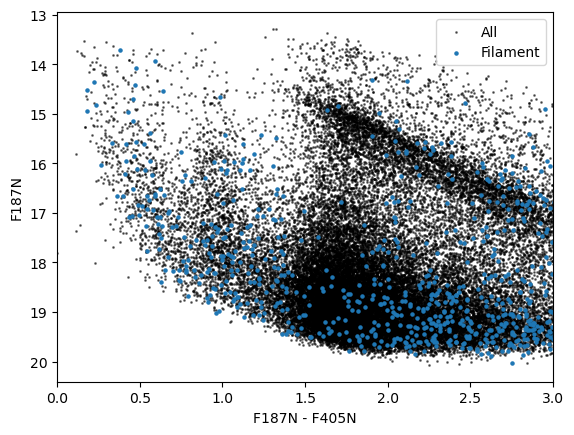

In [11]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

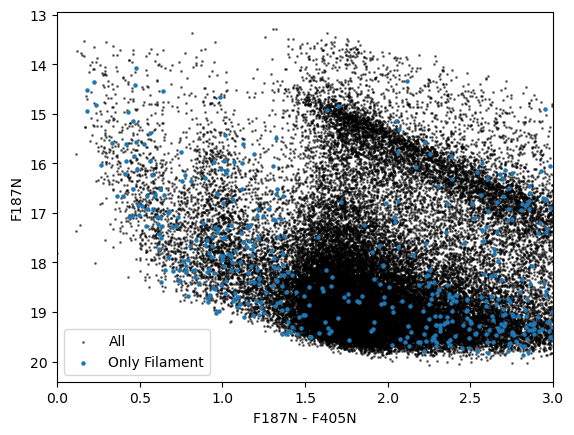

In [12]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
cat_only_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Only Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

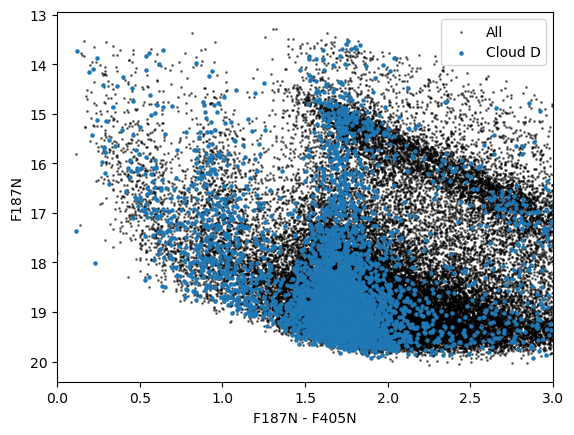

In [13]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

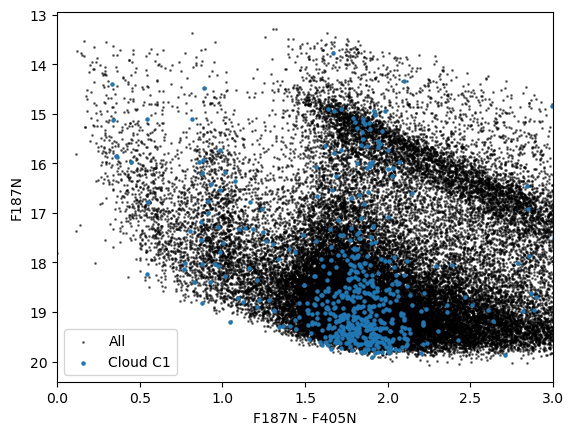

In [14]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

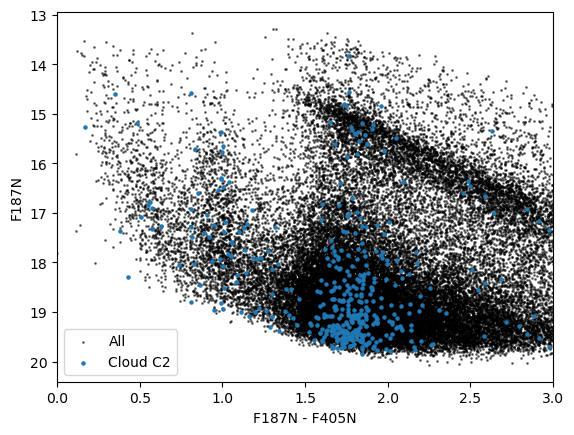

In [15]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

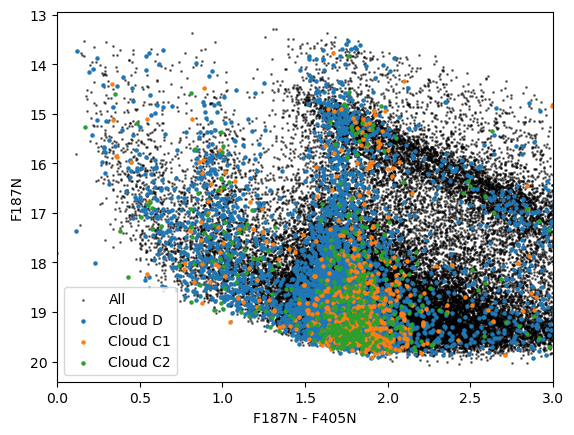

In [16]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

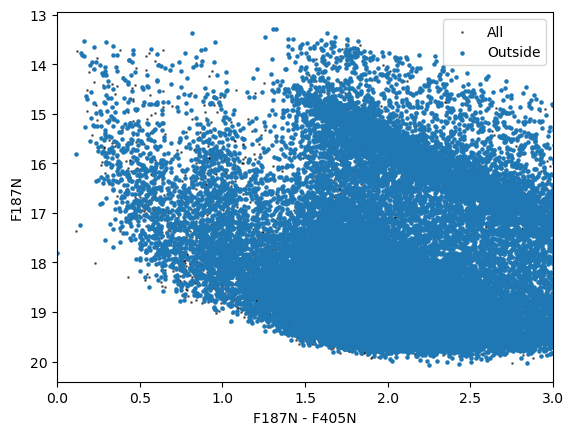

In [17]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')
cat_outside.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Outside')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

## F182M and F410M

(0.0, 6.0)

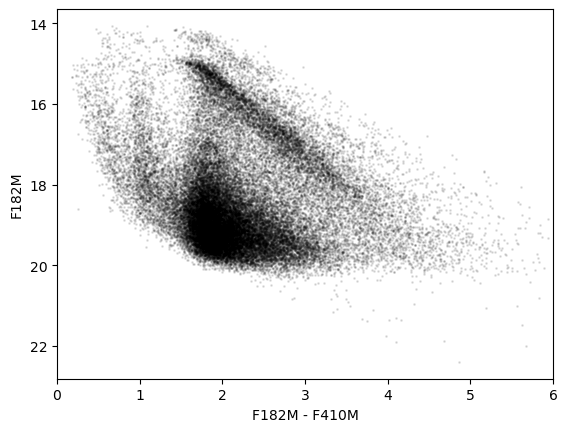

In [18]:
ax = plt.subplot(111)

cat_use.plot_CMD('F182M', 'F410M', 'F182M', ax=ax, alpha=0.1, s=1, label='All', color='black')

ax.set_xlim(0, 6)